Loading the libraries 

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score



Reading the cardiac.csv using from pandas library

In [2]:
data = pd.read_csv('cardiac.csv')
data.head()

,caseno,age,weight,gender,fitness_score,cardiac_condition
0,1,37,70.47,Male,55.79,Absent
1,2,73,50.34,Female,35.00,Absent
2,3,46,87.65,Male,42.93,Present
3,4,36,89.80,Female,28.30,Present
4,5,34,103.02,Male,40.56,Absent


Preprocessing

In [3]:
# Checking data types and missing values
data_info = data.info()
missing_values = data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   caseno             100 non-null    int64  
 1   age                100 non-null    int64  
 2   weight             100 non-null    float64
 3   gender             100 non-null    object 
 4   fitness_score      100 non-null    float64
 5   cardiac_condition  100 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 4.8+ KB


NO missing values hence it makes easier to proceed further

In [4]:
missing_values

caseno               0
age                  0
weight               0
gender               0
fitness_score        0
cardiac_condition    0
dtype: int64

Converting the categorical variables into binary 
method used - LabelEncoder()

In [6]:
# Initialize label encoders
label_encoder_gender = LabelEncoder()
label_encoder_cardiac = LabelEncoder()

Converting the gender and cardiac condition column and assigning a different name 

In [7]:
# Encode categorical variables
data['gender_encoded'] = label_encoder_gender.fit_transform(data['gender'])
data['cardiac_condition_encoded'] = label_encoder_cardiac.fit_transform(data['cardiac_condition'])

Splitting the dataset into X and y 

In [8]:
# Splitting the dataset into training and test sets
X = data[['age', 'weight', 'gender_encoded', 'fitness_score']]  # Predictor variables
y = data['cardiac_condition_encoded']  # Target variable

As requested the student number is 22211420 is used as randam state for reproducibility 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22211420)

Training dataset size is 70 as becasuse test size is assigned as 0.3 which means 70% of data will be used for training 

In [35]:
X_train.shape

(70, 4)

The test set contains gender_encoded 1 for male & 0 for female

In [36]:
X_test

,age,weight,gender_encoded,fitness_score
93,36,70.84,1,55.91
37,32,74.78,1,62.13
25,33,68.52,0,40.34
70,48,85.94,1,45.84
16,47,56.18,1,47.23
52,39,79.39,0,33.84
45,34,72.29,1,47.17
27,48,82.16,0,49.87
89,43,53.00,0,42.00
56,31,71.03,1,52.30


In [37]:
y_train

82    0
58    1
29    0
60    1
39    1
     ..
4     0
46    1
61    0
90    0
84    0
Name: cardiac_condition_encoded, Length: 70, dtype: int64

In [38]:
y_test

93    0
37    0
25    0
70    0
16    1
52    0
45    0
27    0
89    0
56    0
34    0
57    0
22    0
51    0
30    1
86    0
7     0
19    1
6     0
83    1
43    0
1     0
0     0
76    1
35    0
8     1
32    1
2     1
73    0
88    1
Name: cardiac_condition_encoded, dtype: int64

the complete dataframe which is combined to the original dataframe with cardiac_condition & cardiac_condition_encoded which is converted using laber encoder

In [11]:
# Display the first few rows of the modified dataset to confirm the changes
data.head()

,caseno,age,weight,gender,fitness_score,cardiac_condition,gender_encoded,cardiac_condition_encoded
0,1,37,70.47,Male,55.79,Absent,1,0
1,2,73,50.34,Female,35.00,Absent,0,0
2,3,46,87.65,Male,42.93,Present,1,1
3,4,36,89.80,Female,28.30,Present,0,1
4,5,34,103.02,Male,40.56,Absent,1,0


Visualization

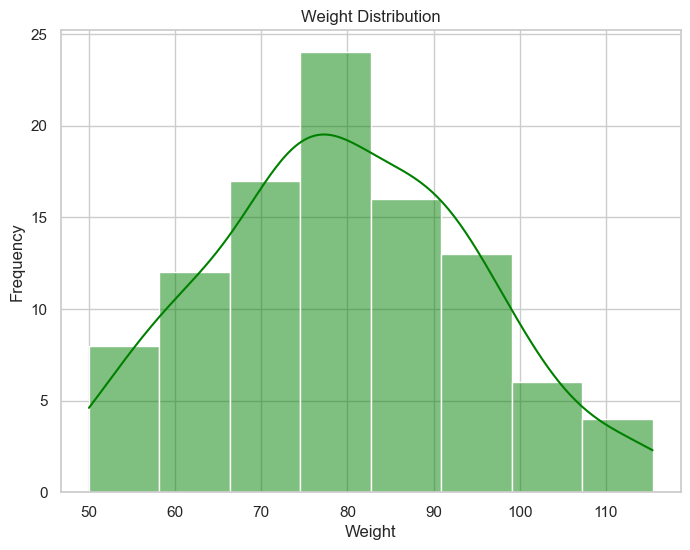

In [24]:
# Plotting the histogram for weight
plt.figure(figsize=(8, 6))
sns.histplot(data['weight'], kde=True, color="green")
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

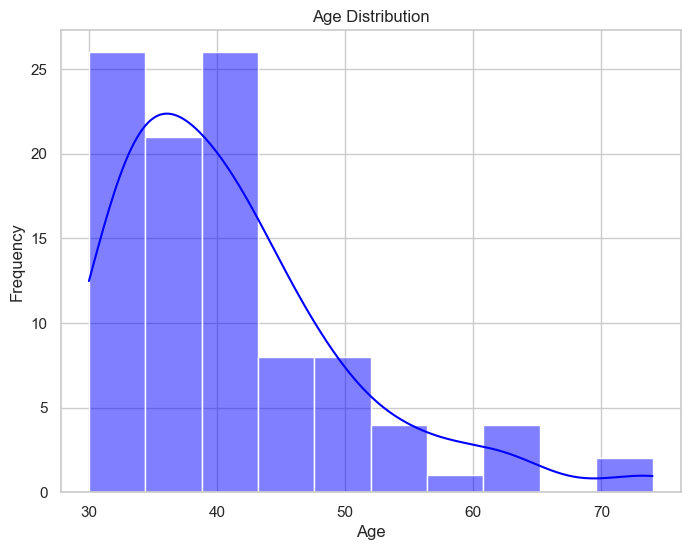

In [26]:
# Plotting the histogram for age
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True, color="blue")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

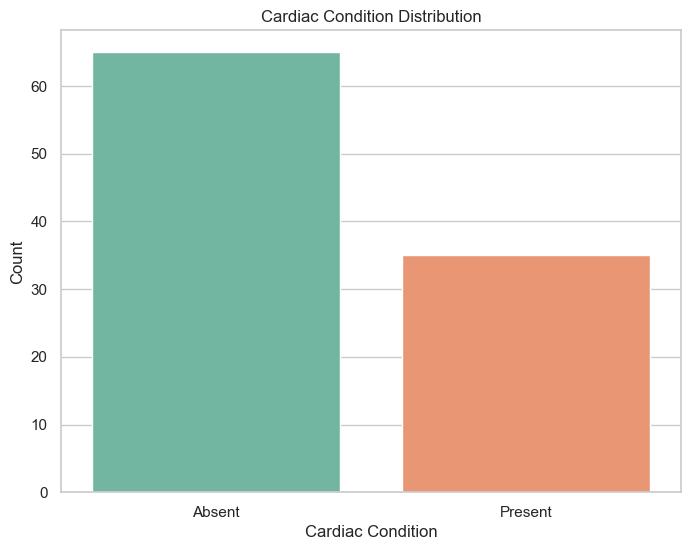

In [27]:
# Plotting the count plot for cardiac condition
plt.figure(figsize=(8, 6))
sns.countplot(x='cardiac_condition', data=data, palette="Set2")
plt.title('Cardiac Condition Distribution')
plt.xlabel('Cardiac Condition')
plt.ylabel('Count')
plt.show()

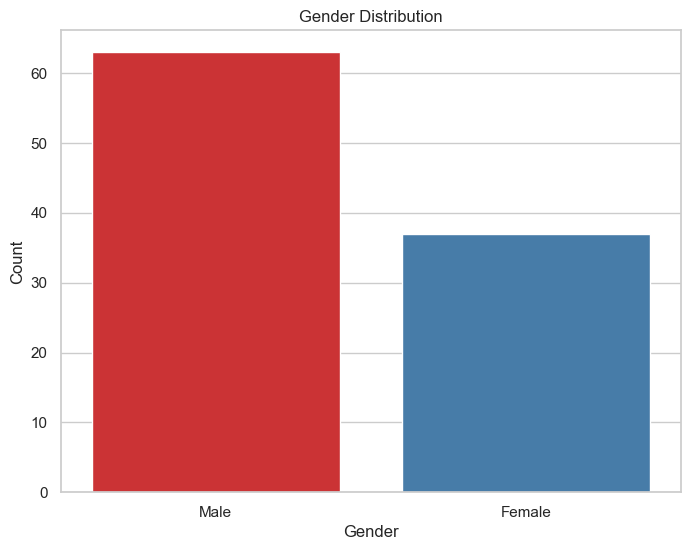

In [28]:
# Plotting the count plot for gender
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data, palette="Set1")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

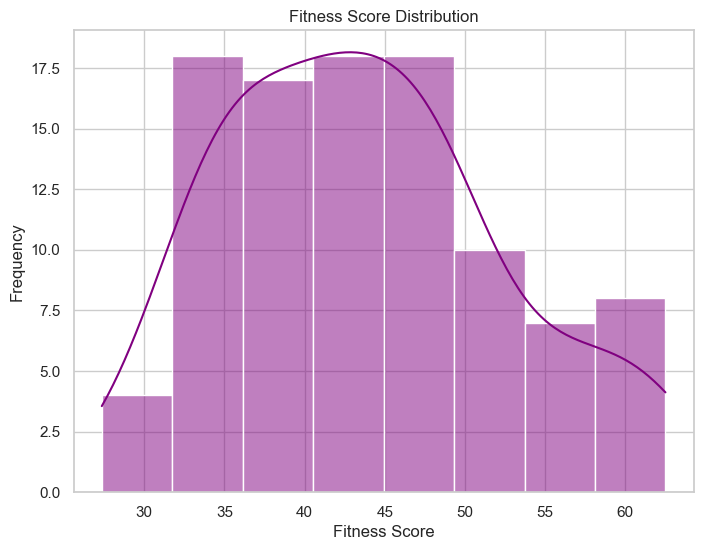

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(data['fitness_score'], kde=True, color="purple")
plt.title('Fitness Score Distribution')
plt.xlabel('Fitness Score')
plt.ylabel('Frequency')
plt.show()

Now as we got our insights lets build the model 
we are going to use train data

In [16]:
# Building the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Now on test data

In [17]:
# Predicting on the test set
y_pred = logreg.predict(X_test)


For evaluation purposes 
1)confusion matrix
2)roc_auc 
3)accuracy
4)coefficients  have used here

In [18]:
# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [19]:
# Computing ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc = roc_auc_score(y_test, y_pred)

conf_matrix, roc_auc

(array([[17,  4],
        [ 5,  4]]),
 0.626984126984127)

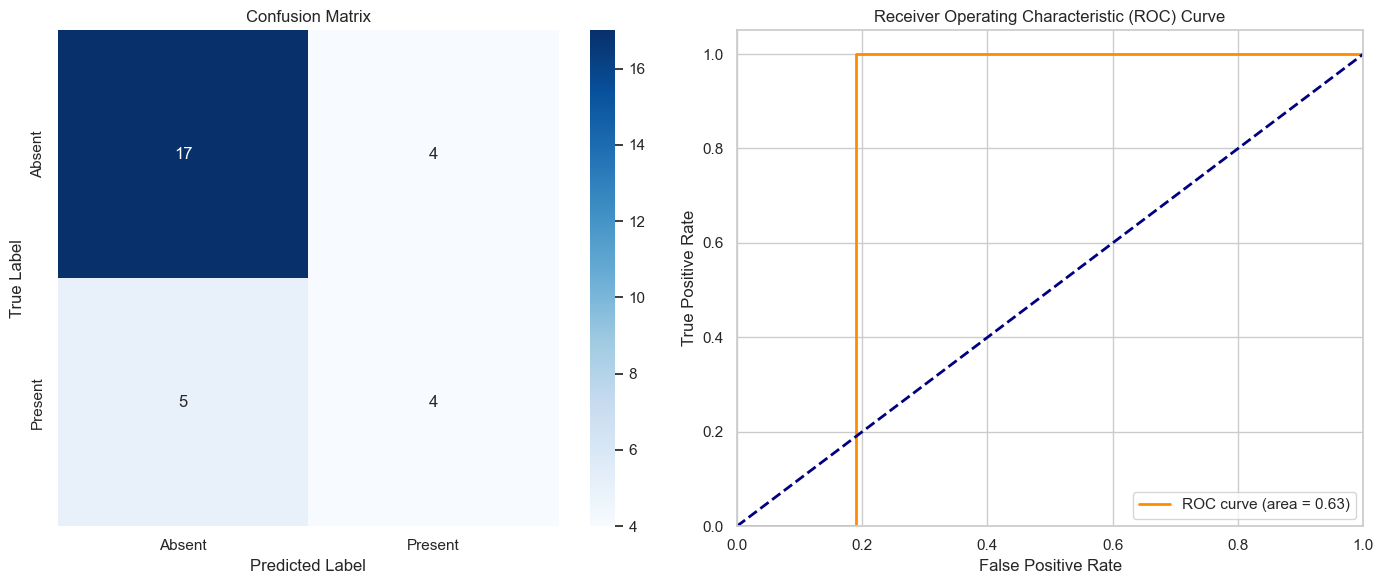

In [20]:
# Plotting the confusion matrix and ROC curve

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')
axes[0].set_xticklabels(['Absent', 'Present'])
axes[0].set_yticklabels(['Absent', 'Present'])

# ROC Curve
axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()

In [31]:
# Coefficients of the logistic regression model
coefficients = pd.DataFrame(logreg.coef_, columns=X_train.columns)
coefficients = coefficients.transpose()
coefficients.columns = ['Coefficient']

In [32]:
coefficients

,Coefficient
age,0.115197
weight,0.001450
gender_encoded,1.287771
fitness_score,-0.075669


In [33]:
# Calculating the accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)


The accuracy shows as 70 %

In [34]:
accuracy

0.7